**CODERS CAVE INTERNSHIP - AUGUST SEPTEMBER 2023**\
**TASK - EMAIL SPAM DETECTION SYSTEM**\
**NINAD NILESH SUGANDHI**

1. [Importing Libraries](#importing-libraries)
2. [Loading Data](#loading-data) 💎
3. [Data Preprocessing](#data-preprocessing) ⚙️
4. [EDA](#eda) 📊
5. [Modeling](#modeling)
6. [LSTM](#lstm)

<a id="importing-libraries"></a>
1. Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras.layers import Embedding, Dense, LSTM, GlobalMaxPool1D, SpatialDropout1D
import visualkeras
from PIL import ImageFont
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Flatten
from keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from PIL import Image
import os
from wordcloud import WordCloud

<a id="loading-data"></a>
2. Loading Data 💎

In [5]:
df = pd.read_csv("D:\\NINAD SUGANDHI\\GOOGLE COLAB\\spam.csv", encoding="latin-1")

df = df.dropna(how="any", axis=1)
df.columns = ['target', 'message']

df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<a id="data-preprocessing"></a>
3. Data Preprocessing ⚙️

In [6]:
df.head(10)

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [7]:
df.tail()

,target,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [8]:
df.tail(10)

,target,message
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...
5563,ham,Ard 6 like dat lor.
5564,ham,Why don't you wait 'til at least wednesday to ...
5565,ham,Huh y lei...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [9]:
df.isnull()

,target,message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [10]:
df.isnull().sum()

target     0
message    0
dtype: int64

In [11]:
df.shape

(5572, 2)

In [12]:
df.dtypes

target     object
message    object
dtype: object

In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:
df.size

11144

In [15]:
df.info

<bound method DataFrame.info of      target                                            message
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham              Will Ì_ b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [16]:
df.describe

<bound method NDFrame.describe of      target                                            message
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham              Will Ì_ b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [18]:
df.describe()

,target,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


<a id="eda"></a>
4. EDA 📊

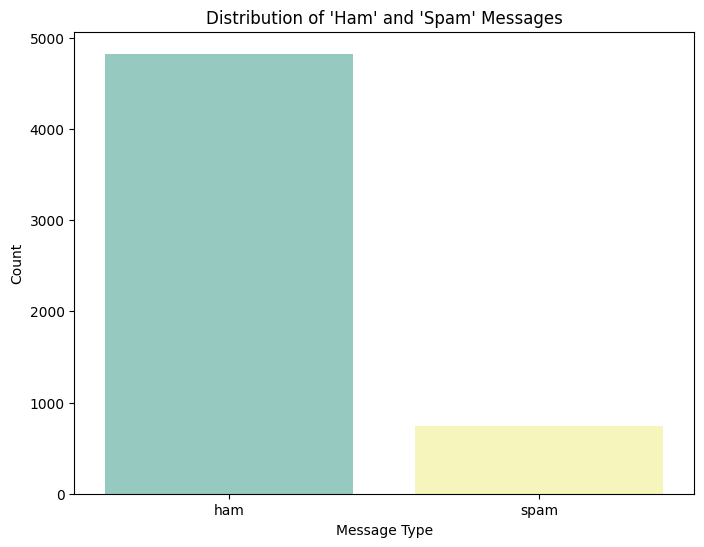

In [19]:
grouped = df.groupby('target')

# Count the number of 'ham' and 'spam' messages
target_counts = grouped.size()

# Create a bar plot to visualize the distribution of 'ham' and 'spam' messages
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette="Set3")
plt.title("Distribution of 'Ham' and 'Spam' Messages")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

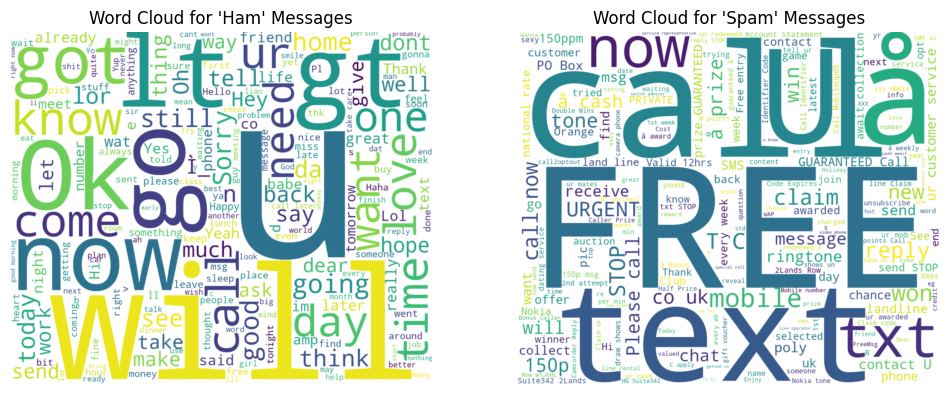

In [20]:
# Generate word clouds for 'ham' messages
ham_messages = df[df['target'] == 'ham']['message']
ham_wordcloud = WordCloud(width=1200, height=1000, background_color='white').generate(' '.join(ham_messages))

# Generate word clouds for 'spam' messages
spam_messages = df[df['target'] == 'spam']['message']
spam_wordcloud = WordCloud(width=1200, height=1000, background_color='white').generate(' '.join(spam_messages))

# Plot the word clouds side by side
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for 'Ham' Messages")
plt.axis("off")

plt.subplot(122)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for 'Spam' Messages")
plt.axis("off")

plt.show()

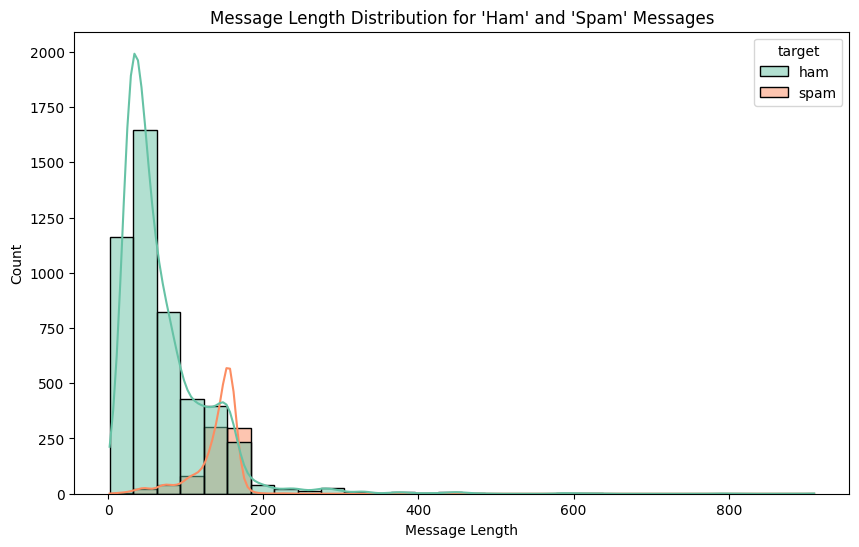

In [21]:
df['message_length'] = df['message'].apply(len)

# Plot histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='message_length', hue='target', bins=30, kde=True, palette="Set2")
plt.title("Message Length Distribution for 'Ham' and 'Spam' Messages")
plt.xlabel("Message Length")
plt.ylabel("Count")
plt.show()

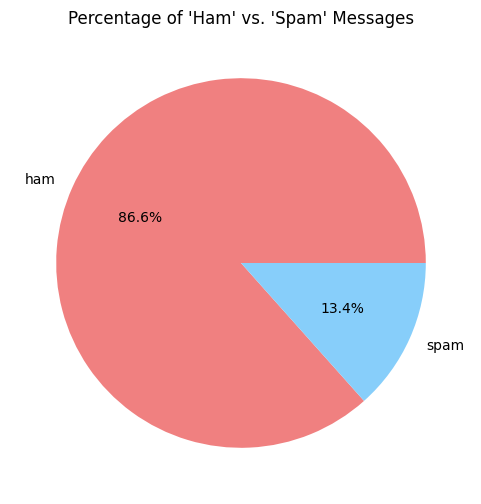

In [22]:
target_percentage = df['target'].value_counts(normalize=True)

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_percentage, labels=target_percentage.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title("Percentage of 'Ham' vs. 'Spam' Messages")
plt.show()

<a id="modeling"></a>
5. Modeling

In [23]:
le = LabelEncoder()
le.fit(df['target'])
df['encode_target'] = le.transform(df['target'])

In [24]:
X = df['message']
y = df['encode_target']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

4179 4179
1393 1393


In [26]:
# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(X_train)
CountVectorizer()
# Use the trained to create a document-term matrix from train and test sets
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

In [27]:
nb = MultinomialNB()

# Train the model
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [28]:
y_pred_class = nb.predict(X_test_dtm)
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
print("Accuracy score: ", round(100*accuracy_score(y_test, y_pred_class), 2))
confusion_matrix(y_test, y_pred_class)
print(classification_report(y_test, y_pred_class))

Accuracy score:  98.21
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1202
           1       0.98      0.88      0.93       191

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [29]:
max_words = 1000  # Maximum number of words to keep based on word frequency
max_sequence_length = 100  # Maximum sequence length for padding

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['message'])

X = tokenizer.texts_to_sequences(df['message'])
X = pad_sequences(X, maxlen=max_sequence_length, padding='post', truncating='post')

label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])

X_train, X_test, y_train, y_test = train_test_split(X, df['target'], test_size=0.2, random_state=42)

<a id = "lstm"></a>
**6. LSTM**

In [30]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
model.add(Conv1D(128, 5,padding='same',input_shape=(128,1)))#1
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))

model.add(Conv1D(128, 5,padding='same',))                  #2
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.1))

model.add(Conv1D(128, 5,padding='same',))                  #3
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv1D(128, 5,padding='same',))                  #4
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(8))                                        #5                     
model.add(Activation('softmax'))
opt = optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()
#plot_model(model, to_file='model.png')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          128000    
                                                                 
 conv1d (Conv1D)             (None, 100, 128)          82048     
                                                                 
 activation (Activation)     (None, 100, 128)          0         
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 12, 128)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 128)           82048     
                                                        

In [31]:
# Train the model
batch_size = 64
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/10
56/56 [==============================] - 5s 71ms/step - loss: 0.7011 - accuracy: 0.8513 - val_loss: 0.3587 - val_accuracy: 0.8621
Epoch 2/10
56/56 [==============================] - 4s 64ms/step - loss: 0.2423 - accuracy: 0.8900 - val_loss: 0.0860 - val_accuracy: 0.9686
Epoch 3/10
56/56 [==============================] - 4s 66ms/step - loss: 0.0684 - accuracy: 0.9790 - val_loss: 0.0614 - val_accuracy: 0.9765
Epoch 4/10
56/56 [==============================] - 4s 65ms/step - loss: 0.0238 - accuracy: 0.9919 - val_loss: 0.0550 - val_accuracy: 0.9821
Epoch 5/10
56/56 [==============================] - 4s 65ms/step - loss: 0.0104 - accuracy: 0.9972 - val_loss: 0.0686 - val_accuracy: 0.9854
Epoch 6/10
56/56 [==============================] - 4s 63ms/step - loss: 0.0047 - accuracy: 0.9983 - val_loss: 0.0724 - val_accuracy: 0.9821
Epoch 7/10
56/56 [==============================] - 3s 62ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0957 - val_accuracy: 0.9832
Epoch 8/10
56